In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

### Independence ###
Random variables $X$ and $Y$ are *independent* if
$$
P(X \in A, Y \in B) = P(X \in A)P(Y \in B)
$$
for all intervals $A$ and $B$.

Let $X$ have density $f_X$, let $Y$ have density $f_Y$, and suppose $X$ and $Y$ are independent. Then if $f$ is the joint density of $X$ and $Y$,

\begin{align*}
f(x, y)dxdy &\sim P(X \in dx, Y \in dy) \\
&= P(X \in dx)P(Y \in dy) ~~~~~ \text{(independence)} \\
&= f_X(x)dx f_Y(y)dy \\
&= f_X(x)f_Y(y)dxdy
\end{align*}

Thus if $X$ and $Y$ are independent then their joint density is given by

$$
f(x, y) = f_X(x)f_Y(y)
$$

This is the *product rule for densities*: the joint density of two independent random variables is the product of their densities.

### Two Independent Normal Random Variables ###
For example, suppose $X$ and $Y$ are i.i.d. standard normal random variables. Then their joint density is given by

$$
f(x, y) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}y^2}, ~~~~ -\infty < x, y < \infty
$$

Equivalently,
$$
f(x, y) = \frac{1}{2\pi} e^{-\frac{1}{2}(x^2 + y^2)}, ~~~~ -\infty < x, y < \infty
$$

Here is a graph of the joint density surface.

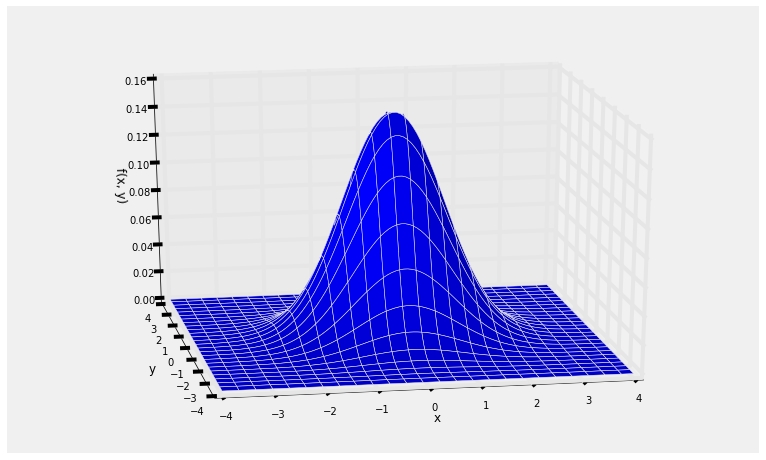

In [3]:
def indep_standard_normals(x,y):
    return 1/(2*math.pi) * np.exp(-0.5*(x**2 + y**2))

Plot_3d((-4, 4), (-4, 4), indep_standard_normals, rstride=4, cstride=4)

Notice the circular symmetry of the surface. This is because the formula for the joint density involves the pair $(x, y)$ through the expression $x^2 + y^2$.

Notice also that $P(X = Y) = 0$, as the probability is the volume over a line. This is true of all pairs of independent random variables with a joint density: $P(X = Y) = 0$. So for example $P(X > Y) = P(X \ge Y)$. You don't have to worry about whether or not to the inequality should be strict.

### The Larger of Two Independent Exponential Random Variables ###
Let $X$ and $Y$ be independent random variables. Suppose $X$ has the exponential $(\lambda)$ distribution $Y$ has the exponential $(\mu)$ distribution. The goal of this example is to find $P(Y > X)$.

By the product rule, the joint density of $X$ and $Y$ is given by

$$
f(x, y) ~ = ~ \lambda e^{\lambda x} \mu e^{-\mu y}, ~~~~ x > 0, ~ y > 0
$$

The graph below shows the joint density surface in the case $\lambda = 0.5$ and $\mu = 0.25$, so that $E(X) = 2$ and $E(Y) = 4$.

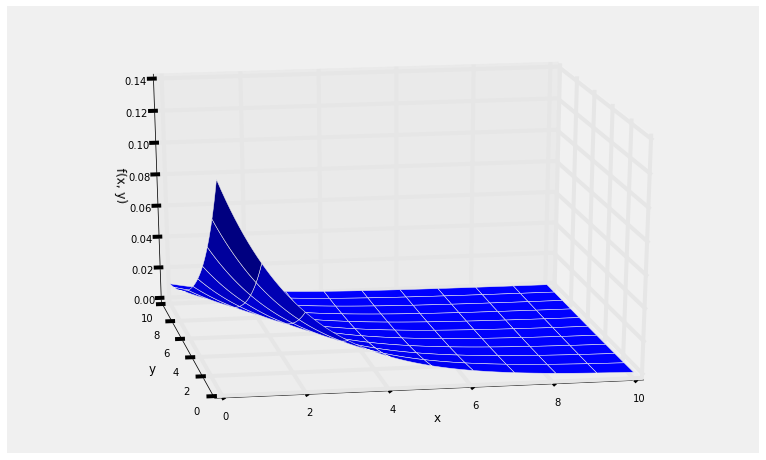

In [4]:
def independent_exp(x, y):
    return 0.5 * 0.25 * np.e**(-0.5*x - 0.25*y)

Plot_3d((0, 10), (0, 10), independent_exp)

To find $P(Y > X)$ we must integrate the joint density over the upper triangle of the first quadrant, a portion of which is shown below.

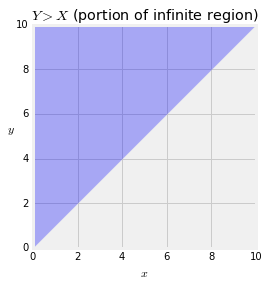

In [34]:
# HIDDEN
xx = np.arange(0, 10.1, 0.1)
yy = 10*np.ones(len(xx))
plt.fill_between(xx, xx, yy, alpha=0.3)
plt.axes().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$Y > X$ (portion of infinite region)');

The probability is therefore
$$
P(Y > X) ~ = ~ \int_0^\infty \int_x^\infty \lambda e^{-\lambda x} \mu e^{-\mu y} dy dx
$$

Let's do this in `SymPy` and then take another look at the calculation. Notice that `SymPy` doesn't want to write the joint density with negative exponents.

In [5]:
declare('x', 'y', 'lamda', 'mu', positive=True)

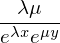

In [6]:
f_X = lamda * exp(-lamda * x)

f_Y = mu * exp(-mu * y)

jt_density = f_X * f_Y
jt_density

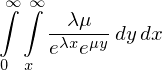

In [7]:
p_Y_greater_than_X = Integral(jt_density, (y, x, oo), (x, 0, oo))
p_Y_greater_than_X

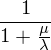

In [8]:
p_Y_greater_than_X.doit()

Easy algebra, or the `rearrange_1` algebraic simplification method, provides an alterative form of the answer:

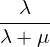

In [10]:
rearrange_1(p_Y_greater_than_X.doit())

Thus
$$
P(Y > X) ~ = ~ \frac{\lambda}{\lambda + \mu}
$$
Analogously,
$$
P(X > Y) ~ = ~ \frac{\mu}{\lambda + \mu}
$$

Notice that the two chances are proportional to the parameters. This is consistent with intuition if you think of $X$ and $Y$ as two lifetimes. If $\lambda$ is large, the corresponding lifetime $X$ is likely to be short, and therefore $Y$ is likely to be larger than $X$ as the formula implies.

If $\lambda = \mu$ then $P(Y > X) = 1/2$ which you can see by symmetry since $P(X = Y) = 0$.

It's instructive to do the integral for calculating $P(Y > X)$ without resorting to `SymPy`. The calculation shows how you can use probability theory to do calculus.

\begin{align*}
P(Y > X) &= \int_0^\infty \int_x^\infty \lambda e^{-\lambda x} \mu e^{-\mu y} dy dx \\ \\
&= \int_0^\infty \lambda e^{-\lambda x} \big{(} \int_x^\infty \mu e^{-\mu y} dy\big{)} dx \\ \\
&= \int_0^\infty \lambda e^{-\lambda x} e^{-\mu x} dx ~~~~~~ \text{(survival function of } Y\text{)} \\ \\
&= \frac{\lambda}{\lambda + \mu} \int_0^\infty (\lambda + \mu) e^{-(\lambda + \mu)x} dx \\ \\
&= \frac{\lambda}{\lambda + \mu} ~~~~~~~ \text{(total integral of exponential }
(\lambda + \mu) \text{ density is 1)}
\end{align*}